In [1]:
import warnings                                     # 경고 메시지를 출력하지 않게 하기 위해 import 한다.
warnings.filterwarnings(action='ignore')            # 경고 메시지를 출력하지 않게 한다.
%config Completer.use_jedi = False                  # 자동 완성 기능이 실행 안될 경우 실행 가능하게 한다.
import numpy as np                                  # 수치 계산, 배열 처리를 하기 위해 import 한다.
import pandas as pd                                 # 데이터 분석을 위한 전처리를 하기 위해 import 한다.
import matplotlib.pyplot as plt                     # 시각화를 하기 위해 import 한다.
import matplotlib as mpl                            # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 현상을 방지하기 위해 import 한다.
mpl.rcParams['axes.unicode_minus'] = False          # matplotlib에서 음수 데이터의 '-' 부호가 깨지는 현상을 방지한다.
plt.rcParams['font.family'] = 'NanumGothicCoding'   # matplotlib에서 사용할 한글 글꼴을 지정한다.
plt.rcParams['font.size'] = 12                      # matplotlib에서 사용할 글꼴의 크기를 지정한다.
import seaborn as sns                               # matplotlib을 기반으로 만든 시각화 도구를 import 한다.
import missingno as msno                            # 누락값의 분포를 그래프 형태로 시각화 하기 위해 import 한다.
from plotnine import *                              # R의 ggplot2 패키지를 사용하는 것 처럼 사용하는 시각화 도구를 import 한다.
import folium                                       # 지도 시각화를 하기 위해 import 한다.
# 쥬피터 노트북에서 그래프를 표시되게 한다. => 지금은 사용하지 않아도 표시된다.
# %matplotlib inline
# 쥬피터 노트북에 출력된 그래프를 변형할 수 있게 한다.
# %matplotlib notebook

서울시는 4급 부서장 이상의 간부직 공무원의 업무 추진비 집행 내역을 활용하여 업무 추진비 사용 목적과 업무 추진비를 사용한 장소를 분석한다.

http://opengov.seoul.go.kr/expense/list

In [2]:
df = pd.read_csv('./data/raw.csv')
df

,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [3]:
# 데이터프레임의 컬럼에 이름을 지정한다. => 인덱스 열에 이름을 지정한 것 처럼 보인다.
df.columns.name = '연번'
# 데이터프레임의 인덱스에 이름을 지정한다.
df.index.name = '일련번호'
df.head()

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,,
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [4]:
# 1소속부서 열의 이름을 소속부서로 변경한다.
# df.columns = ['소속부서', '결제방법', '구분', '대상인원', '부서명', '일련번호', '집행금액', '집행목적', '집행일시', '집행장소']
df.rename(columns={'1소속부서': '소속부서'}, inplace=True)

In [5]:
df.columns

Index(['소속부서', '결제방법', '구분', '대상인원', '부서명', '일련번호', '집행금액', '집행목적', '집행일시',
       '집행장소'],
      dtype='object', name='연번')

In [6]:
# read_csv() 메소드로 파일을 읽어들일 때 index_col 속성을 지정하면 index_col 속성으로 지정한 열을 인덱스로
# 끌어와서 데이터프레임을 만들어 리턴한다.
df = pd.read_csv('./data/raw.csv', index_col='일련번호')
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)


In [7]:
# dtypes 속성이나 info() 메소드를 이용해서 각 열의 정보를 확인한다.
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   집행금액    51455 non-null  float64
 6   집행목적    51440 non-null  object 
 7   집행일시    51455 non-null  object 
 8   집행장소    51421 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


In [8]:
# 누락값의 개수를 확인한다.
# df.isnull().sum()
df.isna().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

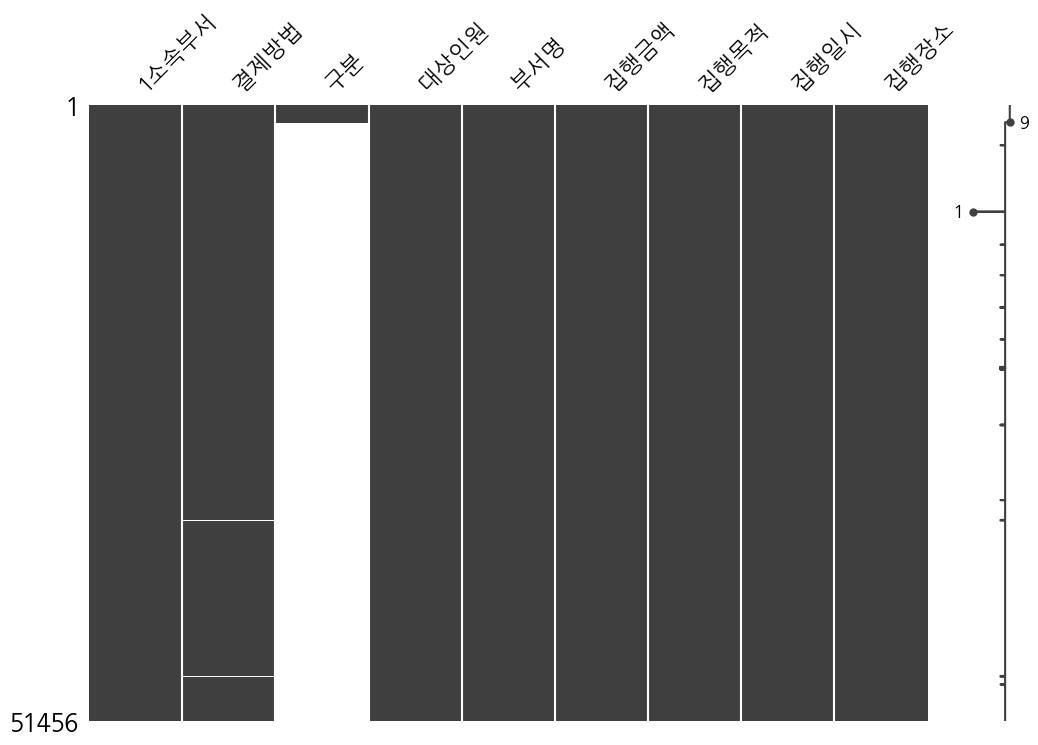

In [9]:
# missingno 패키지로 누락값을 시각화해 본다.
msno.matrix(df, figsize=(12, 8))
plt.show()

In [10]:
# 집행일시에 누락값이 있으므로 해당 데이터를 확인해본다.
df[df.집행일시.isnull()] # df[df.집행일시.isna()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# df[df.집행일시.isnull()].loc['해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.']
# df[df.집행일시.isnull()].iloc[0]
# df[df.집행일시.isnull()].iloc[0].name
df[df.집행일시.isnull()].index[0]

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [12]:
# 집행일시가 누락값인 데이터를 제거한다.
print(df.shape)
df.drop(df[df.집행일시.isnull()].index[0], inplace=True)
print(df.shape)

(51456, 9)
(51455, 9)


집행일시 열의 데이터 타입을 datetime으로 변경한다.

In [13]:
df['집행일시'] = pd.to_datetime(df.집행일시)
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
dtype: object

집행일시 열을 이용해서 '연', '월', '일', '연월', '시', '분', '요일' 파생 변수를 만든다.

In [14]:
print('2018-01-19 20:41'.split(' '))
print('2018-01-19 20:41'.split(' ')[0].split('-'))
print('2018-01-19 20:41'.split(' ')[1].split(':'))

['2018-01-19', '20:41']
['2018', '01', '19']
['20', '41']


In [15]:
from datetime import datetime as dt

In [16]:
now = dt.now()
print(now)
print(now.year)
print(now.month)
print(now.day)
print(now.hour)
print(now.minute)
print(now.second)
print(now.microsecond)
print(now.weekday()) # 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)

2024-05-09 09:16:34.712348
2024
5
9
9
16
34
712348
3


In [17]:
# print(type(df.집행일시)) # <class 'pandas.core.series.Series'>
# 데이터 타입이 datetime인 시리즈에 날짜 시간 속성을 적용하려면 dt를 붙여주면 된다.
# print(type(df.집행일시.dt)) # <class 'pandas.core.indexes.accessors.DatetimeProperties'>
# dt를 붙여주면 year, month, day, hour, minute, second, dayofweek와 같은 속성을 사용할 수 있다.
# dt를 붙여준 시리즈에 대한 작업이 완료되면 다시 시리즈로 돌아간다.
# print(type(df.집행일시.dt.year)) # <class 'pandas.core.series.Series'>
# print(df.집행일시.dt.year)
# 위와 같이 실행하면 dtype이 int64(8바이트 정수)로 지정되므로 메모리를 절약하려면 astype() 메소드로
# 크기를 줄여준다.
print(df.집행일시.dt.year.astype(int)) # astype(np.int32)

일련번호
1     2018
2     2018
3     2018
4     2018
5     2018
      ... 
39    2016
40    2016
41    2016
42    2016
43    2016
Name: 집행일시, Length: 51455, dtype: int32


In [18]:
df['연'] = df.집행일시.dt.year.astype(int)
df['월'] = df.집행일시.dt.month.astype(int)
df['연월'] = df.연.astype(str) + '-' + df.월.astype(str)
df['일'] = df.집행일시.dt.day.astype(int)
df['시'] = df.집행일시.dt.hour.astype(int)
df['분'] = df.집행일시.dt.minute.astype(int)
# df['요일'] = df.집행일시.dt.weekday.astype(int)
df['요일'] = df.집행일시.dt.dayofweek.astype(int)
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
일련번호,,,,,,,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-1,19,20,41,4
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-1,23,19,6,1
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-1,29,20,13,0
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,9,4
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),2016,12,2016-12,29,13,23,3
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),2016,12,2016-12,29,21,19,3
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),2016,12,2016-12,30,13,4,4


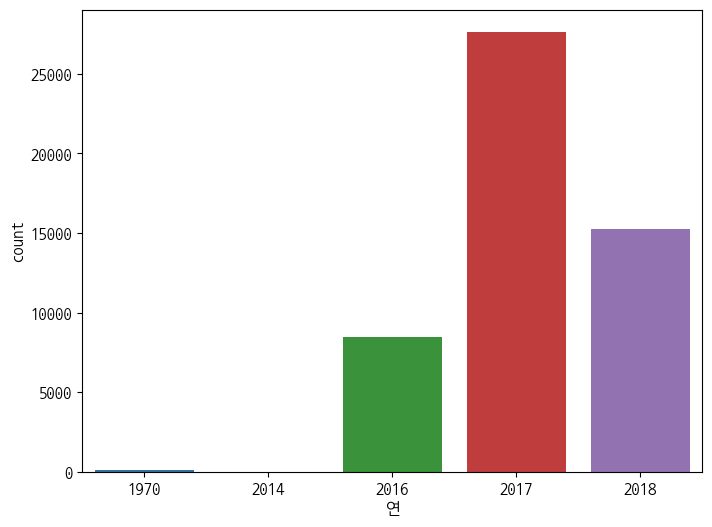

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='연')
plt.show()

In [20]:
df[df.연 == 1970]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
일련번호,,,,,,,,,,,,,,,,
31,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1970-1,1,9,0,3
46,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1970-1,1,9,0,3
27,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1970-1,1,9,0,3
37,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1970-1,1,9,0,3
38,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1970-1,1,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3


In [21]:
df[df.연 == 2014]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일
일련번호,,,,,,,,,,,,,,,,
26,비상기획관,카드,NaN,"민방위담당관, 주ㅇㅇ주무관등 16명",민방위담당관,64000.0,제407차 민방위의 날 전국 지진대피훈련 관련 간담회,2014-04-23 10:41:00,서울시청구내식당(중구 세종대로),2014,4,2014-4,23,10,41,2


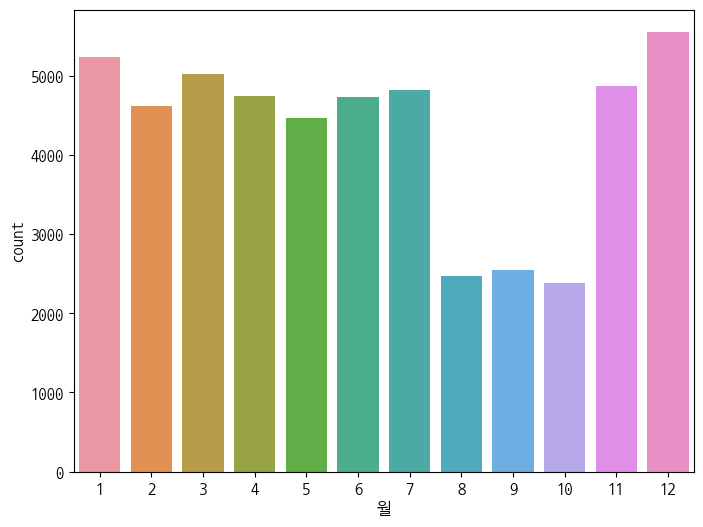

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='월')
plt.show()

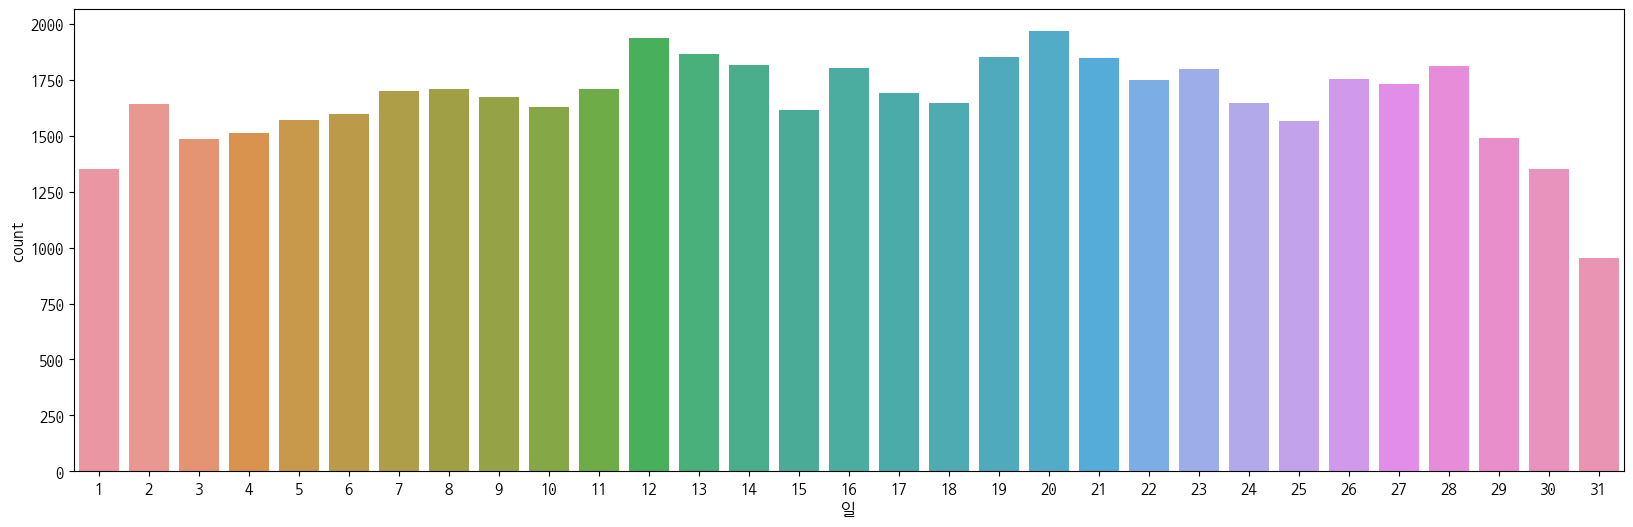

In [23]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='일')
plt.show()

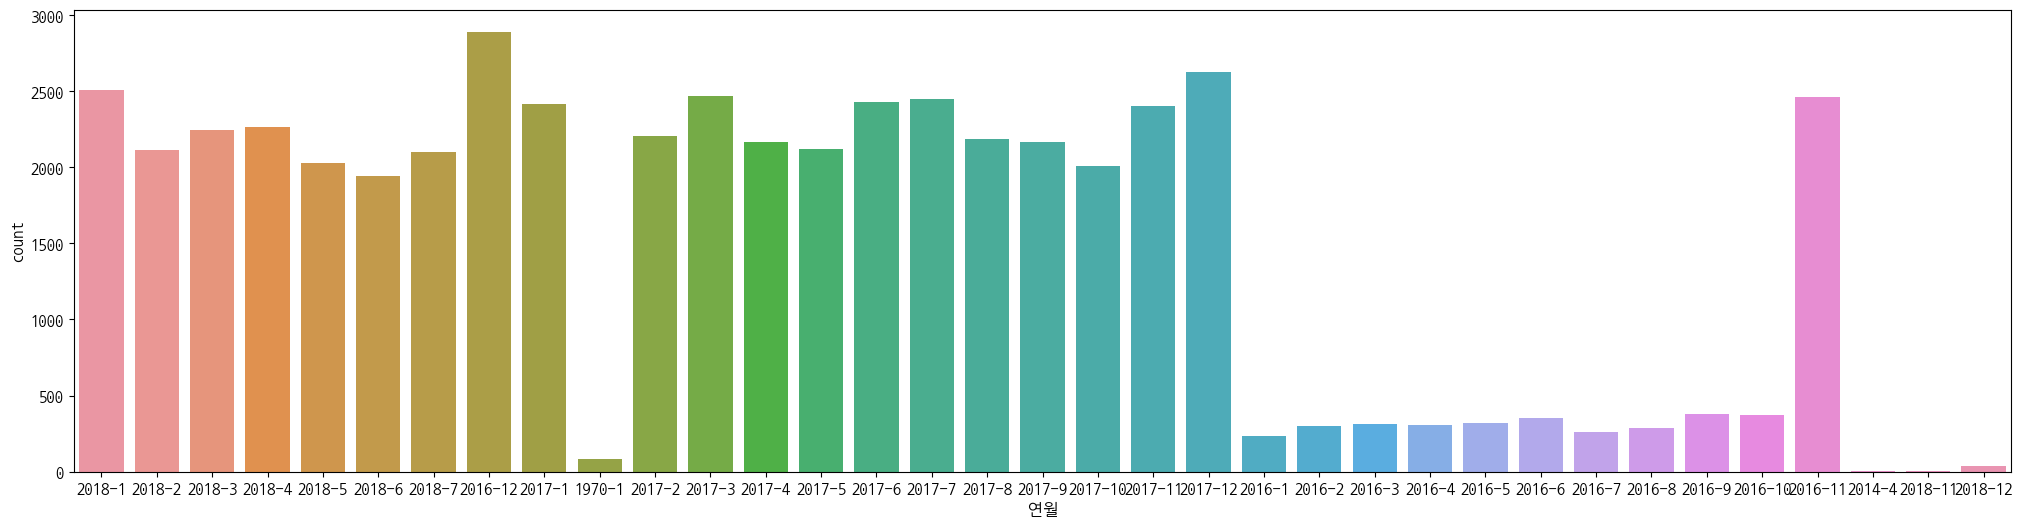

In [24]:
plt.figure(figsize=(25, 6))
sns.countplot(data=df, x='연월')
plt.show()

In [25]:
# 그래프를 '연월'순으로 보기 위해서 연, 월을 오름차순으로 정렬한다.
# sort_values() 메소드의 by 옵션에 정렬의 기준으로 사용할 컬럼을 지정하고(by는 안써도 된다.) ascending 옵션의
# 기본값은 True이고 오름차순으로 정렬되고 False를 지정하면 내림차순으로 정렬된다.
df.sort_values(by=['연', '월'], inplace=True, ascending=False) # '연'이 같으면 '월'을 기준으로 정렬한다.

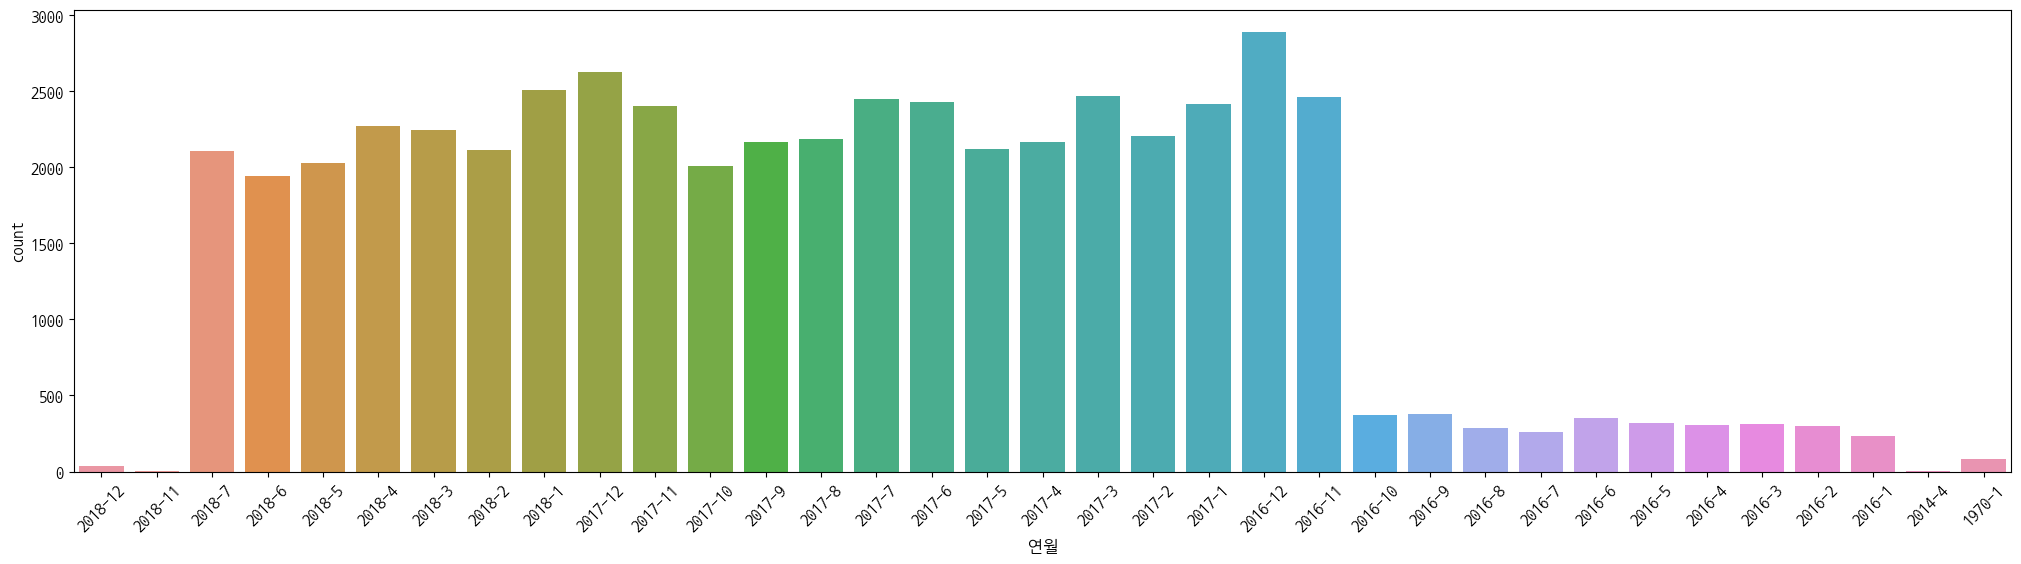

In [26]:
plt.figure(figsize=(25, 6))
# ax = sns.countplot(data=df, x='연월')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.countplot(data=df, x='연월')
plt.xticks(rotation=45)
plt.show()

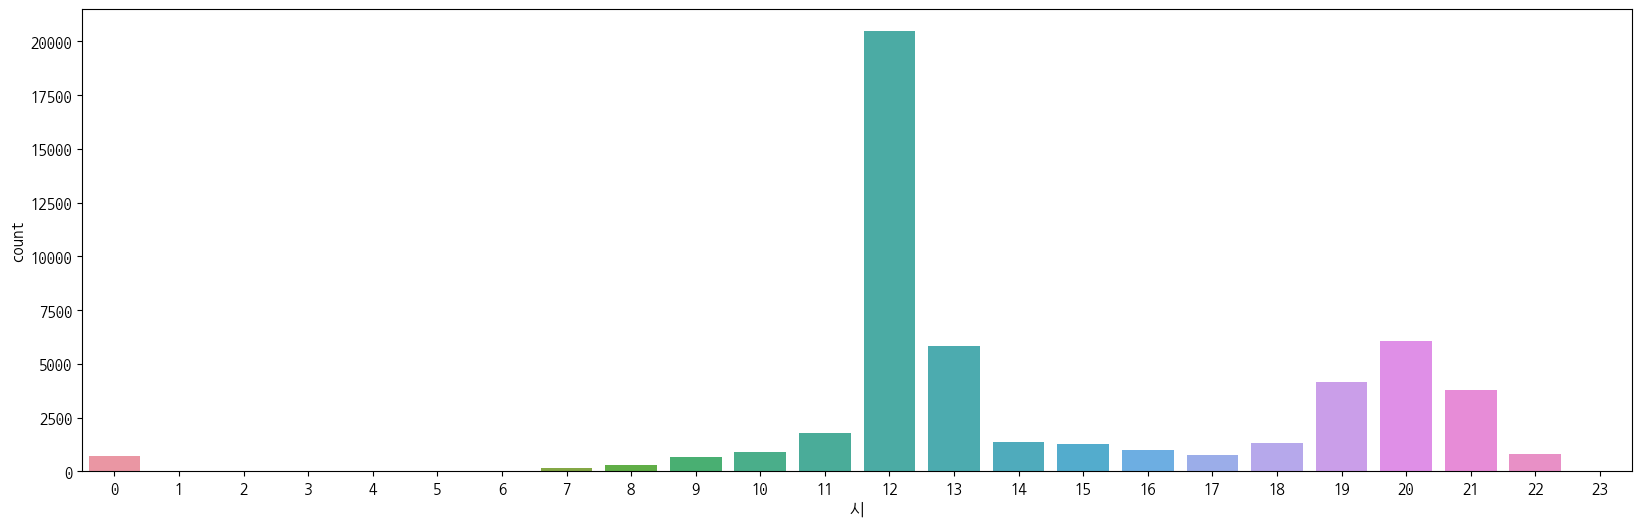

In [27]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='시')
plt.show()

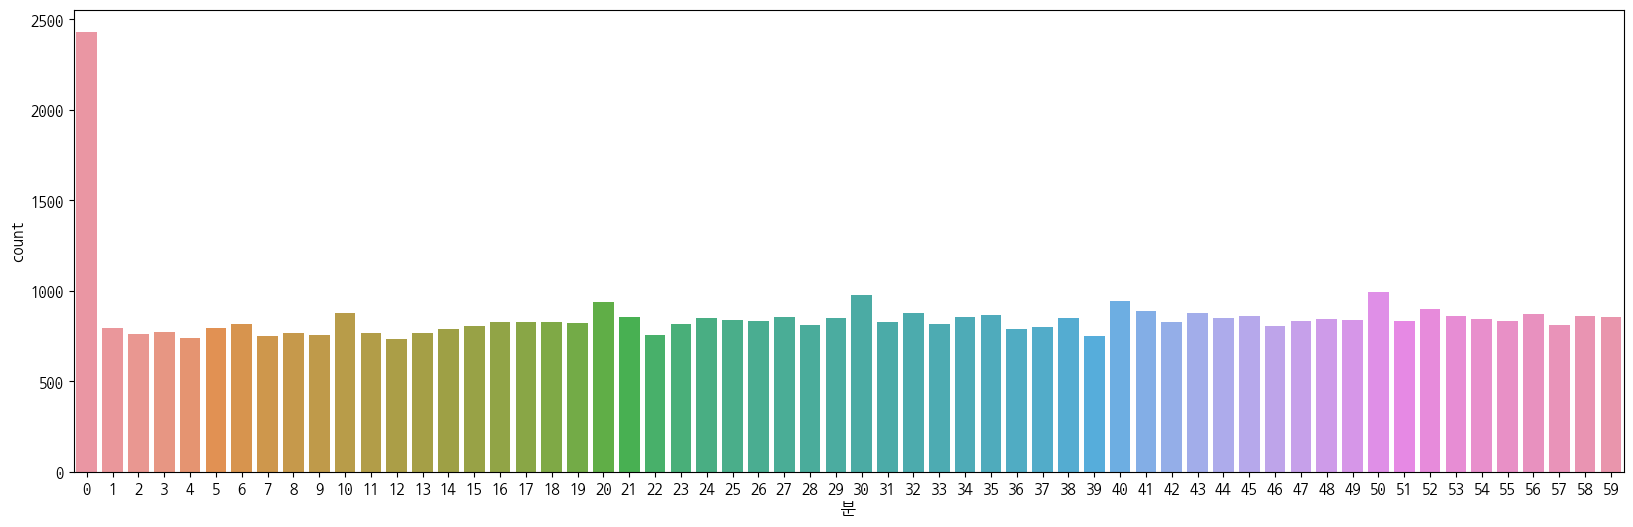

In [28]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='분')
plt.show()

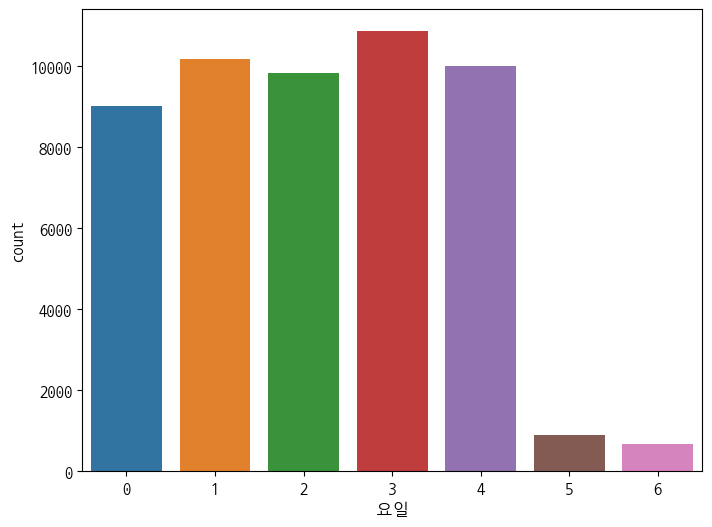

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='요일')
plt.show()

In [30]:
# 요일이 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일)과 같이 표시되므로 요일을 문자로 저장하는 파생 변수를 추가한다.
week_dict = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
print(week_dict)

{0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}


In [31]:
df['요일_한글'] = df.요일.apply(lambda week: week_dict[week] + '요일')
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토요일
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화요일
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화요일
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화요일
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3,목요일
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3,목요일
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3,목요일


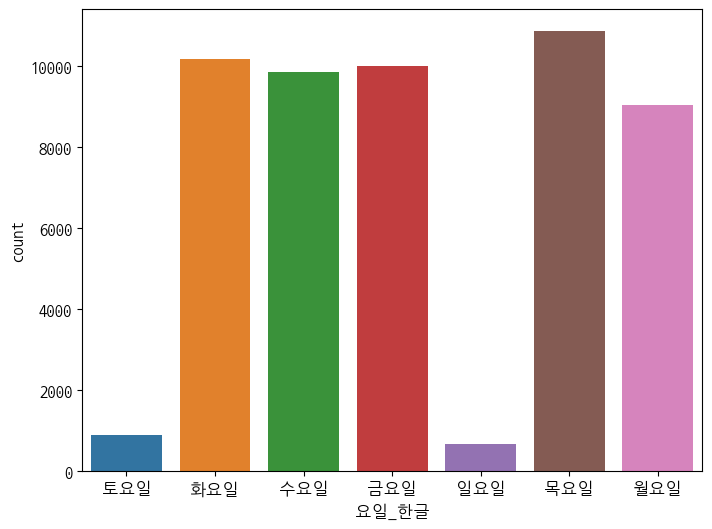

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='요일_한글')
plt.show()

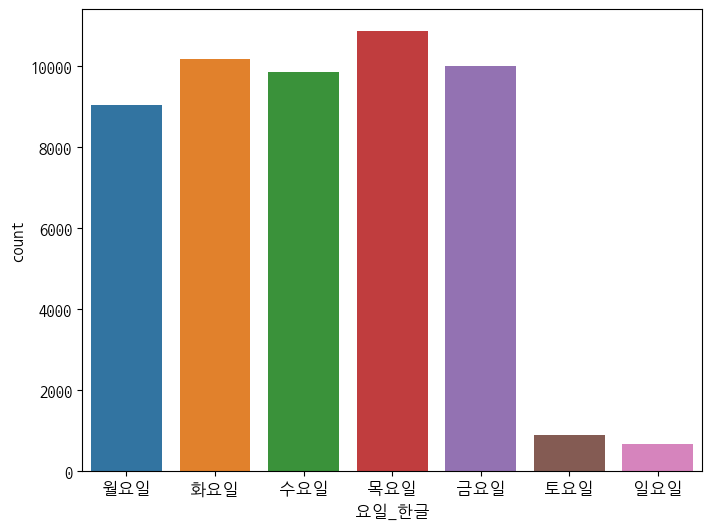

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df.sort_values(by='요일'), x='요일_한글')
plt.show()

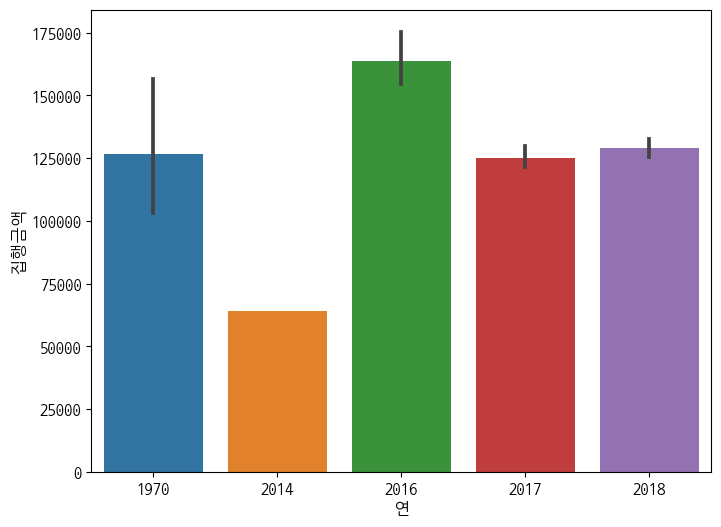

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='연', y='집행금액')
plt.show()

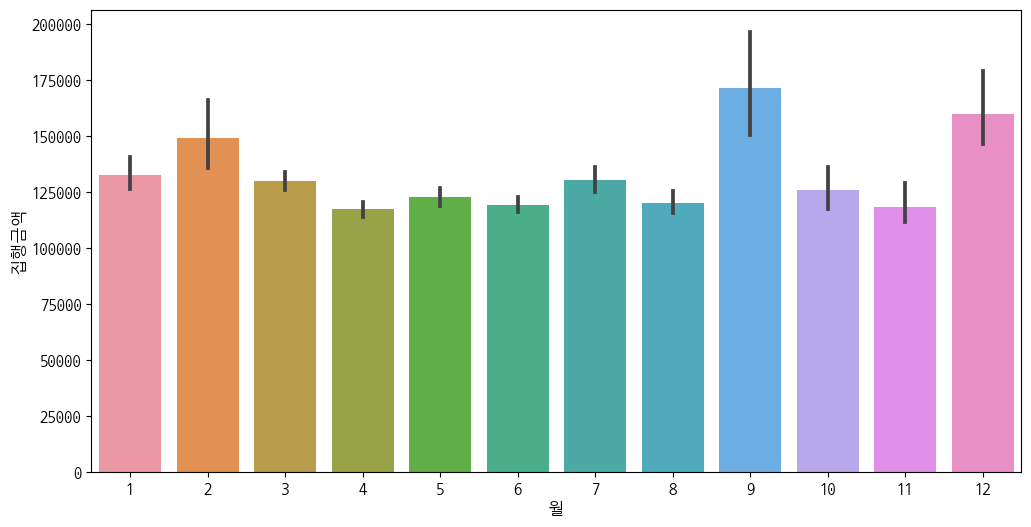

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='월', y='집행금액')
plt.show()

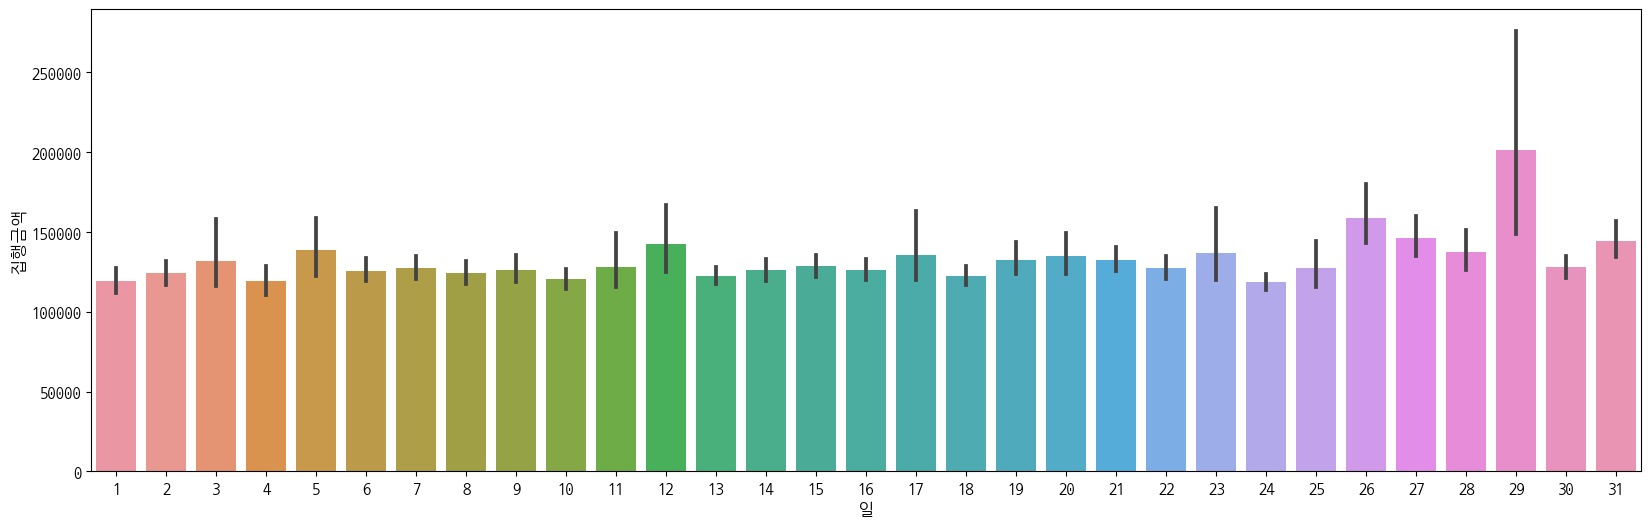

In [40]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='일', y='집행금액')
plt.show()

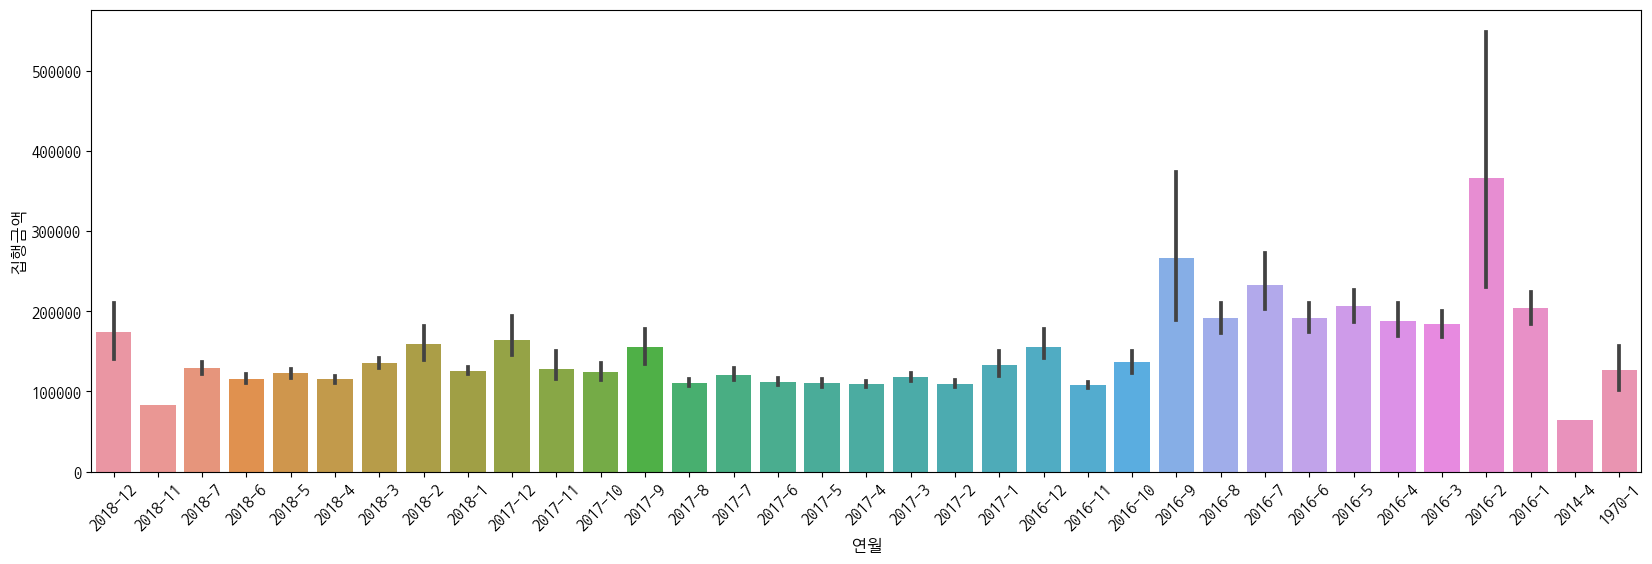

In [43]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='연월', y='집행금액')
plt.xticks(rotation=45)
plt.show()

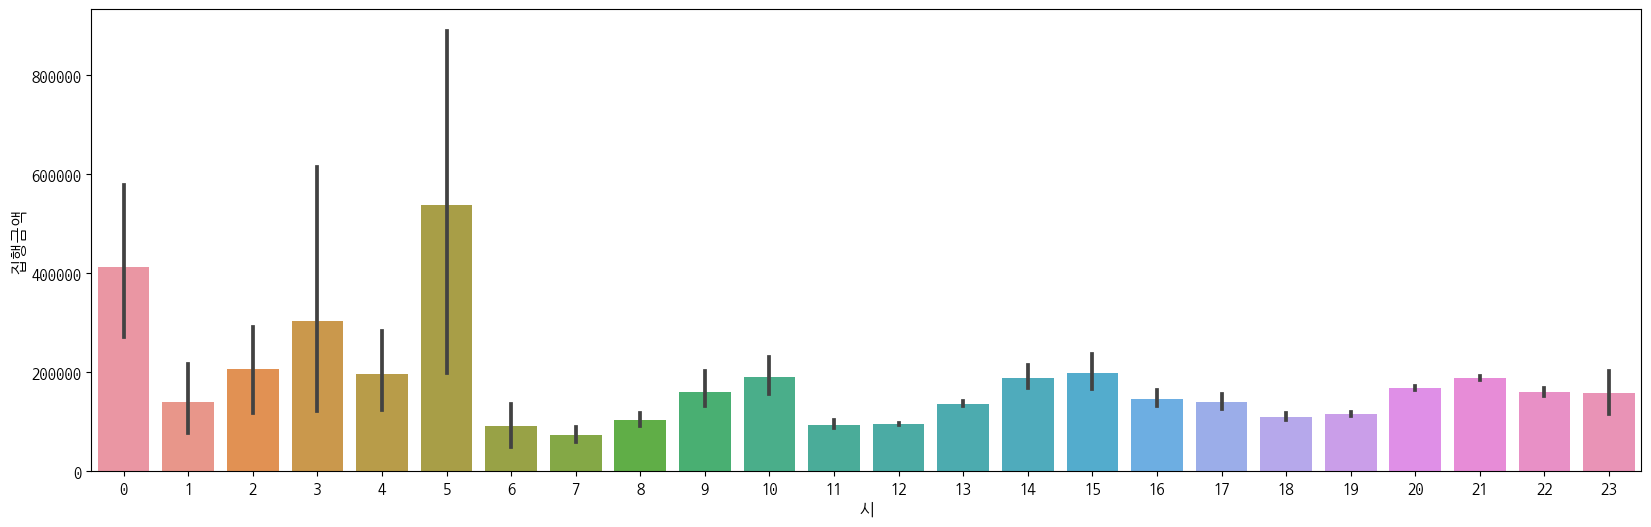

In [45]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='시', y='집행금액')
plt.show()

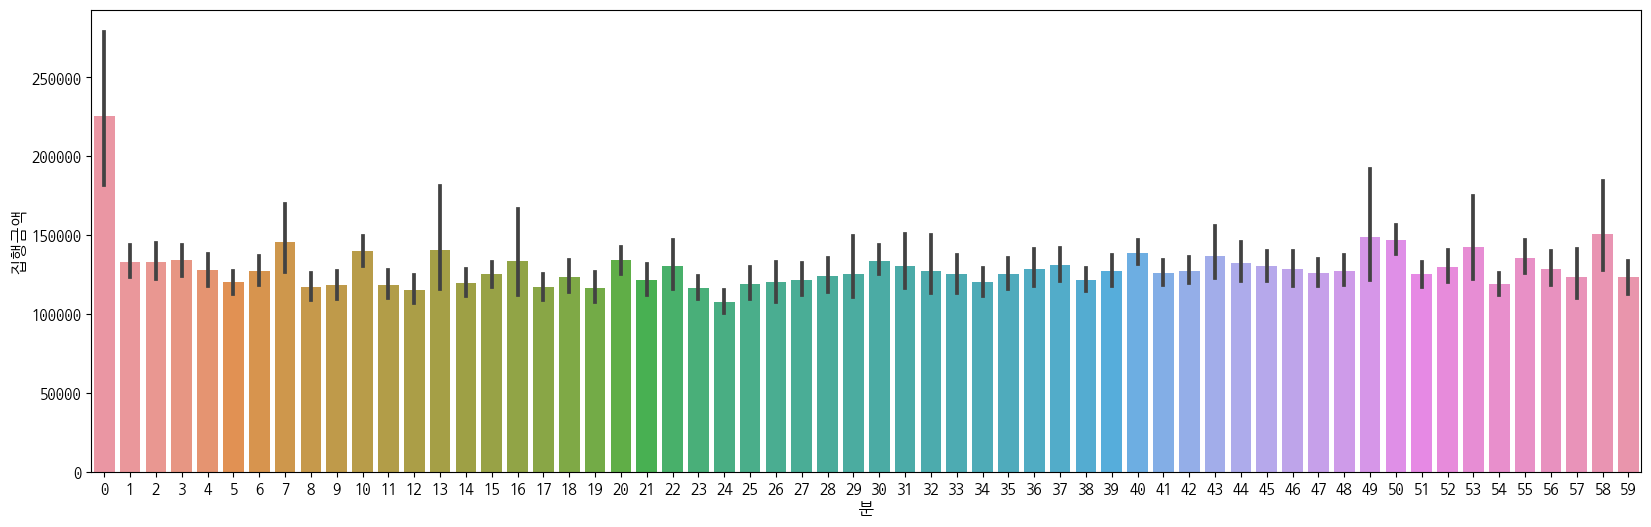

In [46]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='분', y='집행금액')
plt.show()

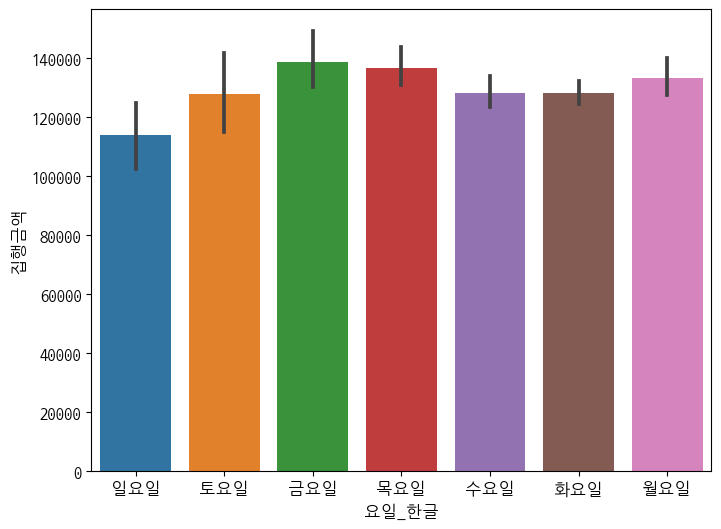

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df.sort_values(by='요일', ascending=False), x='요일_한글', y='집행금액')
plt.show()

집행목적 워드클라우드

In [50]:
from wordcloud import WordCloud

In [51]:
# 집행목적이 누락값인 데이터를 확인한다.
df[df.집행목적.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
112,대변인,카드,NaN,행정팀장 등 4명,대변인 언론담당관,75000.0,NaN,2017-09-28 19:07:00,남산집 (중구 무교동),2017,9,2017-9,28,19,7,3,목요일
28,기획조정실,부서 법인카드,NaN,-,기획조정실 국제교류담당관,450000.0,NaN,2017-08-16 09:07:00,서울시청신매점,2017,8,2017-8,16,9,7,2,수요일
33,기획조정실,법인카드,NaN,-,기획조정실 국제교류담당관,450000.0,NaN,2017-07-21 16:01:00,서울시청매점,2017,7,2017-7,21,16,1,4,금요일
35,관광체육국,카드,NaN,관광체육국장 등 9명,관광체육국 관광정책과,175000.0,NaN,2017-03-28 20:26:00,신안촌 (서울 종로구 경희궁2길 14-4),2017,3,2017-3,28,20,26,1,화요일
1,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,30000.0,NaN,2017-02-01 12:03:00,복성각 (서울 중구 덕수궁길 7),2017,2,2017-2,1,12,3,2,수요일
2,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,21500.0,NaN,2017-02-01 15:30:00,마포만두 (서울 중구 남대문로9길 51),2017,2,2017-2,1,15,30,2,수요일
3,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,56500.0,NaN,2017-02-10 09:48:00,파스쿠찌종각알파빌딩 (서울 종로구 종로),2017,2,2017-2,10,9,48,4,금요일
4,여성가족정책실,카드,NaN,가족담당관외 6명,여성가족정책실 가족담당관,8000.0,NaN,2017-02-10 09:54:00,파리바게뜨 종로시그 (서울 종로구 종로),2017,2,2017-2,10,9,54,4,금요일
5,여성가족정책실,카드,NaN,가족담당관외 8명,여성가족정책실 가족담당관,117000.0,NaN,2017-02-10 12:14:00,（주）뚜리삼 (서울 중구 무교동),2017,2,2017-2,10,12,14,4,금요일


In [53]:
# 집행목적이 누락값인 데이터가 존재하므로 누락값을 공백을 채워준다.
df.집행목적.fillna('', inplace=True)
df[df.집행목적.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,


In [55]:
# 파이썬 문자열 메소드 중에서 특정 문자열을 문자열과 문자열 사이에 삽입하는 join() 메소드를
# 사용해서 집행목적 열에 입력된 데이터를 하나의 문자열로 연결한다.
data = ' '.join(df.집행목적)
data[:100]

'겨울철 응급의료상황대비 업무추진관련 간담회비 지급 시민건강국 현안업무 추진직원 격려 간담회비 지급 시립병원장 회의추진관련 유관부서 간담회비 지급 건강서울종합계획 수립관련 유관부서 '

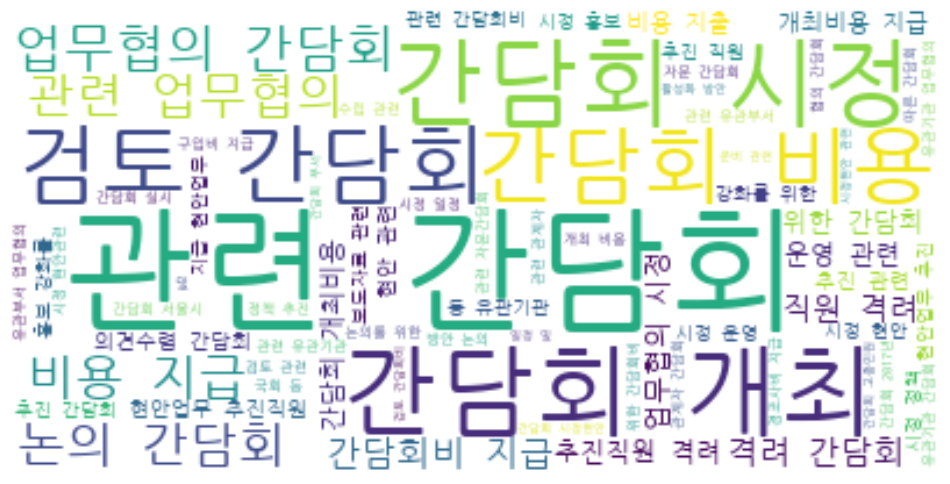

In [56]:
wordcloud = WordCloud(
    background_color='white', 
    font_path='C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
).generate(data)
plt.figure(figsize=[12, 8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

집행장소 워드클라우드

In [57]:
# 집행장소가 누락값인 데이터를 확인한다.
df[df.집행장소.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
3,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시기반시설본부직원 경조사비 지급,2016-04-02,NaN,2016,4,2016-4,2,0,0,5,토요일
4,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,주택건축국직원경조사비 지급,2016-04-03,NaN,2016,4,2016-4,3,0,0,6,일요일
18,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시기반시설본부직원 경조사비 지급,2016-04-09,NaN,2016,4,2016-4,9,0,0,5,토요일
53,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,상수도사업본부직원경조사비 지급,2016-04-28,NaN,2016,4,2016-4,28,0,0,3,목요일
56,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,품질시험소직원경조사비 지급,2016-04-30,NaN,2016,4,2016-4,30,0,0,5,토요일
4,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,물순환안전국직원경조사비 지급,2016-03-02,NaN,2016,3,2016-3,2,0,0,2,수요일
5,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,도시재생본부직원경조사비 지급,2016-03-02,NaN,2016,3,2016-3,2,0,0,2,수요일
11,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,성동구도시관리국직원 경조사비 지급,2016-03-06,NaN,2016,3,2016-3,6,0,0,6,일요일
24,행정2부시장,현금,NaN,행정2부시장,행정2부시장,50000.0,시의회상임위의원경조사비 지급,2016-03-11,NaN,2016,3,2016-3,11,0,0,4,금요일


In [58]:
# 집행장소가 누락값인 데이터가 존재하므로 누락값을 공백을 채워준다.
df.집행장소.fillna('', inplace=True)
df[df.집행장소.isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,


In [59]:
# 집행장소가 '-'인 데이터를 확인한다.
df[df.집행장소 == '-']

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
36,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,1000000.0,사망직원 유족 위로금,2018-07-13 00:00:00,-,2018,7,2018-7,13,0,0,4,금요일
37,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,1000000.0,사망직원 유족 위로금,2018-07-21 00:00:00,-,2018,7,2018-7,21,0,0,5,토요일
38,서울특별시장,현금,현업-우수부서 격려 등,시장,총무과,150000.0,민선7기 현충원 참배(7.2) 근조화 비용 지급,2018-07-05 00:00:00,-,2018,7,2018-7,5,0,0,3,목요일
76,대변인,현금,NaN,대변인,대변인 언론담당관,50000.0,소속 상근직원의 경조사비 지급(부의금),2018-07-19 00:00:00,-,2018,7,2018-7,19,0,0,3,목요일
8,서울혁신기획관,현금,NaN,안OO 주무관,서울혁신기획관 사회혁신담당관,50000.0,경조사비 지급(소속 직원 모친상 부의금),2018-07-04 17:00:00,-,2018,7,2018-7,4,17,0,2,수요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,행정1부시장,현금,NaN,-,행정1부시장,100000.0,부의금 지급(2명),2016-01-12 00:00:00,-,2016,1,2016-1,12,0,0,1,화요일
37,행정1부시장,현금,NaN,-,행정1부시장,150000.0,축.부의금 지급(3명),2016-01-21 00:00:00,-,2016,1,2016-1,21,0,0,3,목요일
50,행정1부시장,현금,NaN,-,행정1부시장,150000.0,축.부의금 지급(3명),2016-01-28 00:00:00,-,2016,1,2016-1,28,0,0,3,목요일


In [61]:
# 집행장소가 '-'인 데이터가 존재하므로 공백로 변경한다.
df.loc[df.집행장소 == '-', '집행장소'] = ''
df[df.집행장소 == '-']

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,


In [63]:
# 집행장소가 '0'인 데이터를 확인한다.
df[df.집행장소 == '0']

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,
52,서울특별시장,현금,현업-우수부서 격려 등,1명,행정국 총무과,1000000.0,직원 사망 유족 위로금,2018-01-15,0,2018,1,2018-1,15,0,0,0,월요일
20,행정국,현금,NaN,행정국장,행정국 총무과,50000.0,소속 상근직원 경조사비 지급,2018-01-15,0,2018,1,2018-1,15,0,0,0,월요일
20,행정국,현금,NaN,행정국장,행정국 총무과,50000.0,소속 상근직원 경조사비 지급,2018-01-15,0,2018,1,2018-1,15,0,0,0,월요일


In [64]:
# 집행장소가 '0'인 데이터가 존재하므로 공백로 변경한다.
df.loc[df.집행장소 == '0', '집행장소'] = ''
df[df.집행장소 == '0']

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글
일련번호,,,,,,,,,,,,,,,,,


In [70]:
# 집행장소에 주소가 많이 보이기 때문에 주소는 전처리를 통해서 제거하고 상호명이라는 파생 변수를 추가한다.
# 집행장소에서 상호명만 가져오려면 여는 괄호 앞쪽에 있는 것을 가져오면 된다.
print('FC외식(중구 태평로1가)'.split('(')[0].strip())
df['상호명'] = df.집행장소.apply(lambda x: x.split('(')[0].strip())
df.head()

FC외식


,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
일련번호,,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토요일,FC외식
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화요일,대가일식
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화요일,한가람
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화요일,무교동낙지
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수요일,장호왕곱창


In [72]:
# 상호명이 공백인 데이터의 집행목적을 확인한다.
df.loc[df.상호명 == '', '집행목적'].value_counts()

소속 상근직원 경조사비 지급         84
소속직원 경조사비 지급            33
축.부의금 지급                31
소속직원 경조사비 지출            20
축의금 지급                  19
                        ..
인권현장탐방 관련 논의를 위한 간담회     1
2017년 구세군 자선냄비 성금 지출     1
2017년 크리스마스 씰 성금 전달      1
포항 지진피해 지역 성금 지급         1
강북구기획재정국직원 경조사비 지급       1
Name: 집행목적, Length: 444, dtype: int64

In [78]:
# 불필요한(상호명이 공백인) 데이터를 제거해서 새로운 데이터프레임으로 만든다.
df_shop = df[df.상호명 != '']
# df_shop.to_csv('./data/shop.csv')
df_shop

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,분,요일,요일_한글,상호명
일련번호,,,,,,,,,,,,,,,,,,
1,시민건강국,카드,NaN,보건의료정책과장 등 8명,보건의료정책과,137600.0,겨울철 응급의료상황대비 업무추진관련 간담회비 지급,2018-12-01 12:27:00,FC외식(중구 태평로1가),2018,12,2018-12,1,12,27,5,토요일,FC외식
2,시민건강국,카드,NaN,시민건강국장 등 3명,보건의료정책과,55000.0,시민건강국 현안업무 추진직원 격려 간담회비 지급,2018-12-04 20:23:00,대가일식(중구 서소문로101),2018,12,2018-12,4,20,23,1,화요일,대가일식
3,시민건강국,카드,NaN,보건의료정책과장 등 6명,보건의료정책과,84000.0,시립병원장 회의추진관련 유관부서 간담회비 지급,2018-12-04 12:45:00,한가람(중구 을지로1가),2018,12,2018-12,4,12,45,1,화요일,한가람
4,시민건강국,카드,NaN,보건정책팀장 등 4명,보건의료정책과,40500.0,건강서울종합계획 수립관련 유관부서 간담회비 지급,2018-12-04 12:33:00,무교동낙지(중구 태평로2가),2018,12,2018-12,4,12,33,1,화요일,무교동낙지
5,시민건강국,카드,NaN,보건정책팀장 등 3명,보건의료정책과,30000.0,예결위 예산심사관련 유관부서 간담회비 지급,2018-12-05 12:43:00,장호왕곱창(중구 서소문로83),2018,12,2018-12,5,12,43,2,수요일,장호왕곱창
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,행정국,카드,NaN,전직원,일력개발과,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1970-1,1,9,0,3,목요일,서울시청매점
33,행정국,카드,NaN,전직원,일력개발과,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1970-1,1,9,0,3,목요일,서울시청신매점
28,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1970-1,1,9,0,3,목요일,먹는세상


In [117]:
df_shop.상호명.value_counts().head(50)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          664
바닷가작은부엌       660
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
복성각           256
월향            256
열빈            230
무교동낙지         229
남포면옥          223
서라벌           205
포메인           205
마마스           202
대상자 소속부서      199
금강산           195
오복미역          194
창고43          190
대복            189
낙동강           188
목포세발낙지        180
주식회사　동원브이아    178
산채향           176
여수바다장어        175
영덕회식당         175
원주추어탕         170
왕왕샤브샤브        169
닥터로빈          169
만복림           166
서울삼계탕         164
서울시청신매점       164
강가            158
라그릴리아         150
충무집           149
이나니와요스케       144
호아빈           143
Name: 상호명, dtype: int64

In [103]:
# 같은 상호명이지만 서로 다른 문자열로 표기된 상호명을 하나로 통일한다.
df_shop.loc[df_shop.상호명 == '㈜ 바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '㈜바닷가 작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '㈜바닷가에작은부엌 중구 덕수궁길 7', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '㈜바닷가작은부엌덕수궁점 중구 덕수궁길 7', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가의 작은부엌덕수궁점', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작은부엌 덕수궁점', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작은부엌덕수궁점', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작은부엌덕수붕점', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작인부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '（주)바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '（주）바닷가 작은부엌', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '（주）바닷가작은부엌 서울 중구 덕수궁길 7', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '（주）바닷가작은부엌 중구 덕수궁길', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '（주）바닷가작은부엌 중구 덕수궁길 7', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작은부엌 중구 덕수궁길 7', '상호명'] = '바닷가작은부엌'
df_shop.loc[df_shop.상호명 == '바닷가작은부엌덕수궁', '상호명'] = '바닷가작은부엌'

In [115]:
df_shop.loc[df_shop.상호명 == '구이구이 서울 중구 을지로', '상호명'] = '구이구이'
df_shop.loc[df_shop.상호명 == '구이구이 중구 을지로', '상호명'] = '구이구이'
df_shop.loc[df_shop.상호명 == '구이구이 중구 을지로1가 6', '상호명'] = '구이구이'
df_shop.loc[df_shop.상호명 == '구이구이 중구 을지로6', '상호명'] = '구이구이'
df_shop.loc[df_shop.상호명 == '남도구이구이', '상호명'] = '구이구이'

In [125]:
set(df_shop.loc[df_shop.상호명.str.find('참숯골') >= 0].상호명)

{'참숯골',
 '참숯골 서울 중구 무교로 16',
 '참숯골 중구 무교로',
 '참숯골 중구 무교로 16',
 '참숯골 중구 무교로16',
 '참숯골서울 중구 무교로 16'}

In [121]:
top_1000 = pd.DataFrame(df_shop.상호명.value_counts().head(1000)).reset_index()
top_1000.columns = ['상호명', '횟수']
top_1000

,상호명,횟수
0,참숯골,773
1,우도일식,729
2,서울시청매점,700
3,구이구이,664
4,바닷가작은부엌,660
...,...,...
995,㈜삼우오펠리스,7
996,애슐리,7
997,계동피자,7
998,㈜스타일카페,7


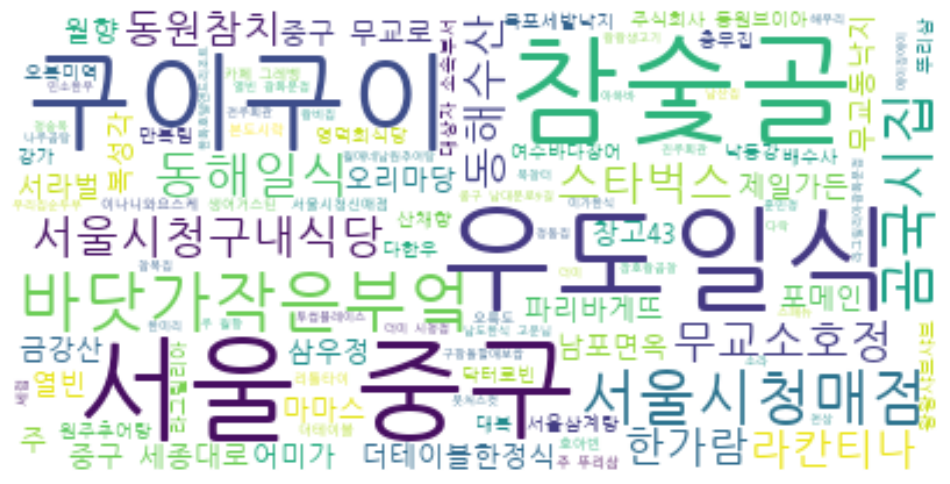

In [129]:
wordcloud = WordCloud(
    background_color='white', 
    font_path='C:\\Windows\\Fonts\\NanumGothicCoding.ttf',
    max_font_size = 50,
    max_words = 100
).generate(' '.join(df_shop.상호명))
plt.figure(figsize=[12, 8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()